# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [15]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [ ]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

In [ ]:
# Check how many rows and columns in the dataframe
gas_df.shape

In [ ]:
# Display all the available column names in the dataframe
gas_df.columns

In [ ]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

In [ ]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

In [ ]:
gas_df.head(3)

In [ ]:
month_type = gas_df['Month'].dtype

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [ ]:
print(result.check())

In [ ]:
gas_df['Month'].dt.year.head()

In [ ]:
gas_df['Month'].dt.month.tail()

---

## Yearly Gas production

In [17]:
gas_df['Year'] = gas_df['Month'].dt.year

yearly_gas_df = gas_df.groupby('Year').sum()

gas_df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,...,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California,Year
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,...,21446,5241,224,243,3975,323,3989,3576,932,2008
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,...,21547,5256,220,243,4179,324,4008,3834,919,2008
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,...,21777,4896,220,249,4092,327,3896,4056,881,2008
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,...,20435,5224,224,260,4069,330,2960,4049,890,2008
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,...,21948,5126,236,267,4168,330,3718,3860,870,2008


In [20]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



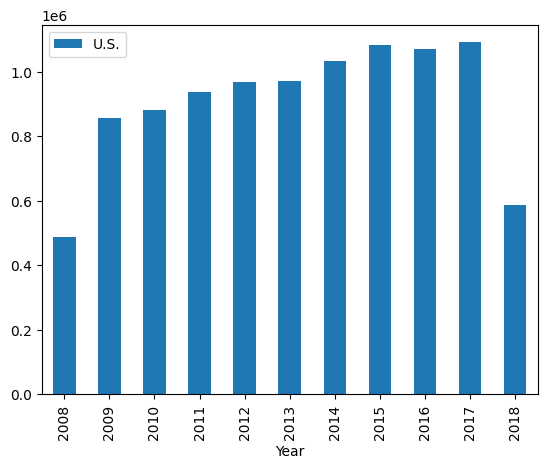

In [33]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year");

In [36]:
years = yearly_gas_df.index

filtered_yearly_gas_df = yearly_gas_df[np.logical_and(years > 2008, years < 2018)]

display(filtered_yearly_gas_df)



,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


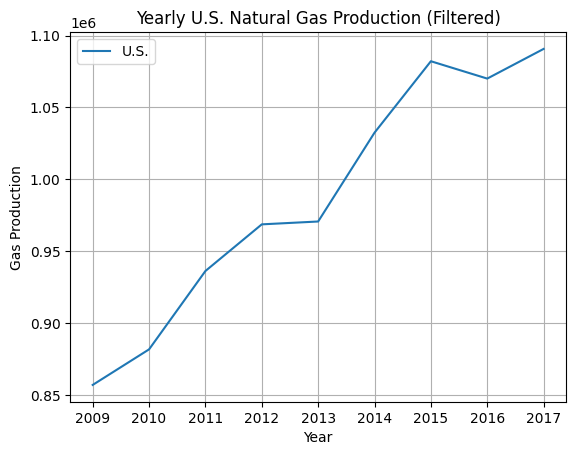

In [51]:
plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind="line")

# Set labels and title
plot.set_xlabel("Year")
plot.set_ylabel("Gas Production")
plot.set_title("Yearly U.S. Natural Gas Production (Filtered)")

# Add legend and grid
plot.legend()
plot.grid(True)

### Check your code

In [52]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master

